<a href="https://colab.research.google.com/github/vivivargas15/ejercicios_datasc/blob/main/global_caso_vivienda_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install sklearn



In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df_vivienda= pd.read_csv("vivienda.csv")

CONOCIENDO LA DATA

In [7]:
df_vivienda.head()


,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


LIMPIZA DE DATOS ,verificar datos nulos, explorando conjunto de datos

In [8]:
df_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   nox       506 non-null    float64
 4   rm        506 non-null    float64
 5   edad      506 non-null    float64
 6   dis       506 non-null    float64
 7   rad       506 non-null    int64  
 8   impuesto  506 non-null    int64  
 9   ptratio   506 non-null    float64
 10  negro     506 non-null    float64
 11  lstat     506 non-null    float64
 12  medv      506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [9]:
df_vivienda.isnull().sum()

crim        0
zn          0
indus       0
nox         0
rm          0
edad        0
dis         0
rad         0
impuesto    0
ptratio     0
negro       0
lstat       0
medv        0
dtype: int64

In [10]:
df_vivienda.describe()

,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
import seaborn as sns

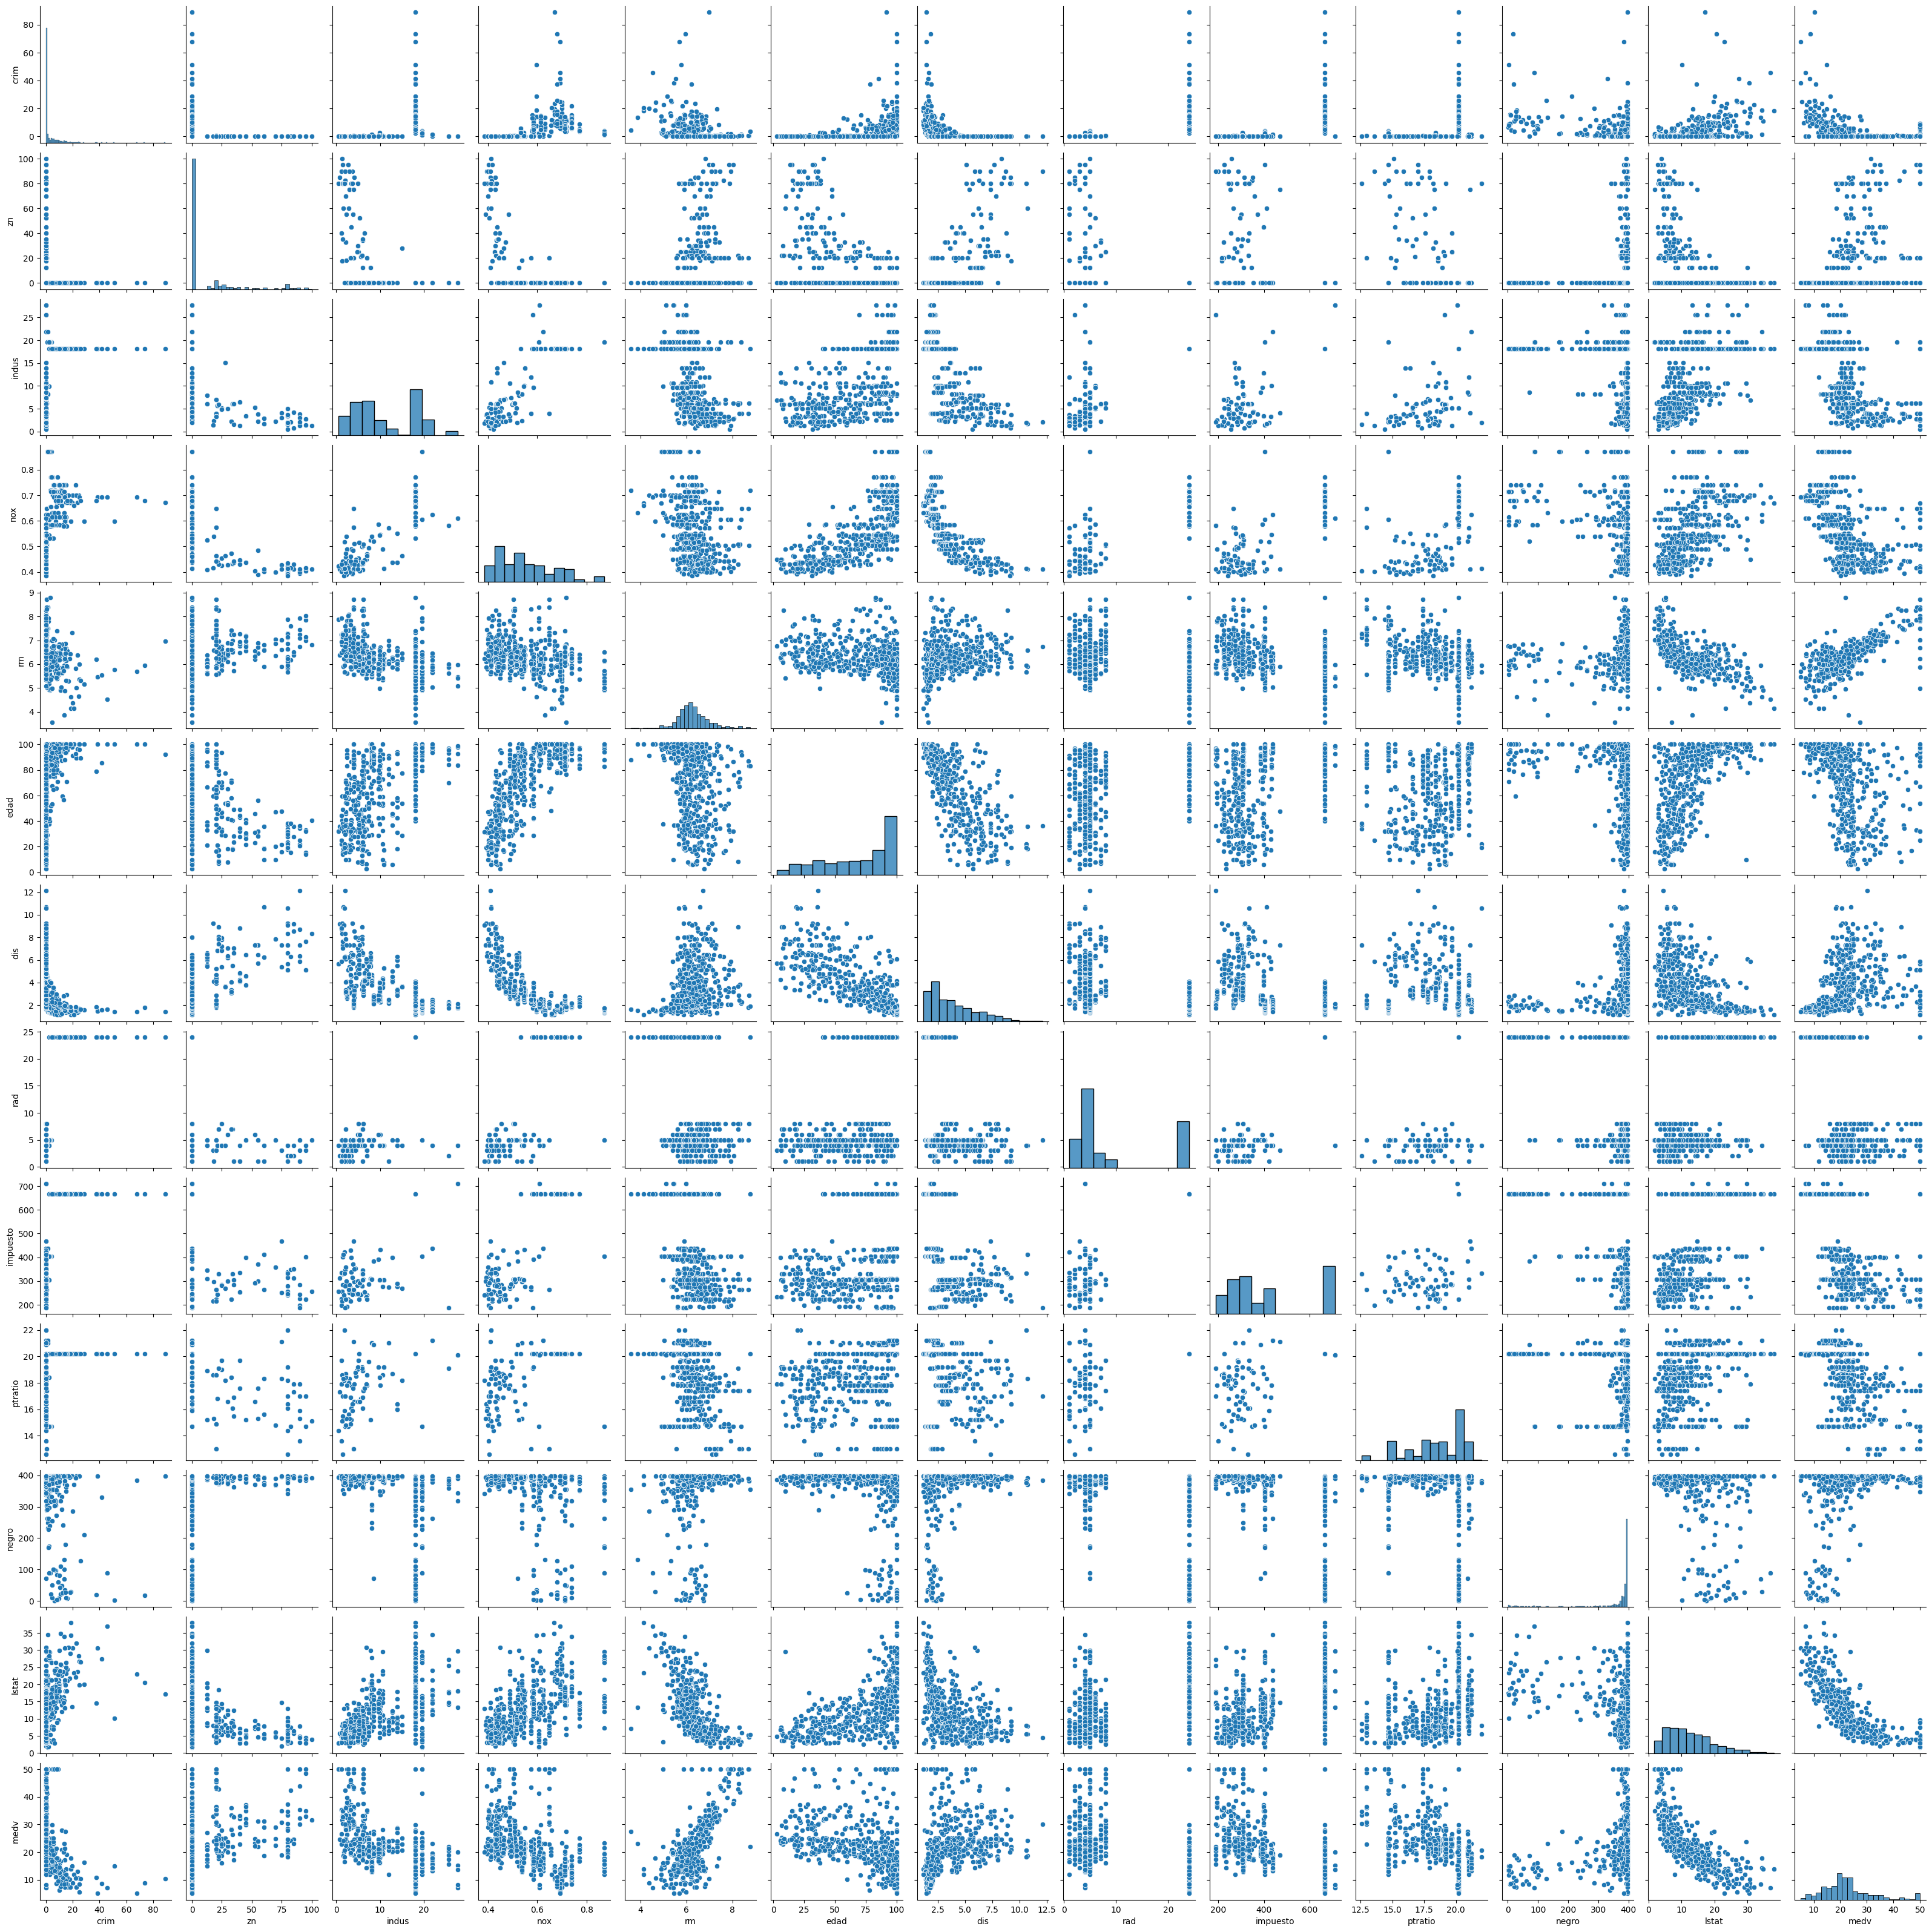

In [12]:
pairplot_all= sns.pairplot(df_vivienda)

SELECCIONO VARIABLES DE INTERES

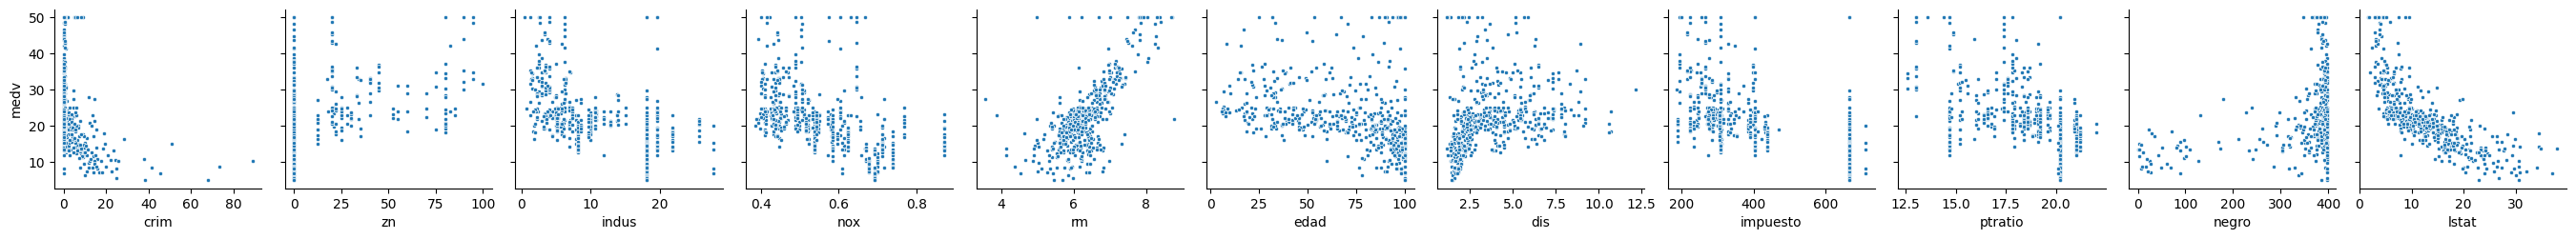

In [13]:
sns.pairplot(df_vivienda,
x_vars= ['crim',	'zn', 'indus', 'nox', 'rm', 'edad', 'dis', 'impuesto','ptratio','negro', 'lstat'],
y_vars=["medv"],
markers="." )

CALCULO DE CALOR Y MAPA DE CALOR

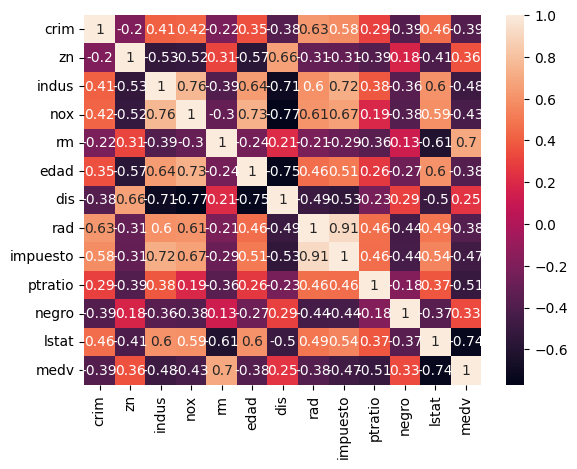

In [15]:
C=df_vivienda.corr()
mapa_de_calor= sns.heatmap(C, annot=True )

# TRAINING

Definimos variables x y y

In [31]:
X= df_vivienda.drop("medv", axis=1)
y= df_vivienda.medv

Traing split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

reg_multiple= LinearRegression()
reg_multiple.fit(X_train, y_train)

LinearRegression()